In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
## Importando arquivo
caminho = '/home/antenor/Documents/IC/Files/kepler_dr3_1arcsec.fits'
data = Table.read(caminho, format='fits')

In [3]:
## Selecionando colunas
data = Table({'ra' : data['ra'], 
                    'dec' : data['dec'], 
                    'plx' : data['parallax'],
                    'mag' : data['phot_g_mean_mag'], 
                    'bp_rp' : data['bp_rp'], 
                    'source_id' : data['source_id']})

In [4]:
## Magnitude absoluta
data['Gmag'] = data['mag'] + 5 * np.log10(data['plx']/100)

/tmp/ipykernel_15066/730418544.py:2: RuntimeWarning: invalid value encountered in log10
  data['Gmag'] = data['mag'] + 5 * np.log10(data['plx']/100)


In [5]:
data = data.to_pandas()
data = data.replace([np.inf,-np.inf],np.nan).dropna()

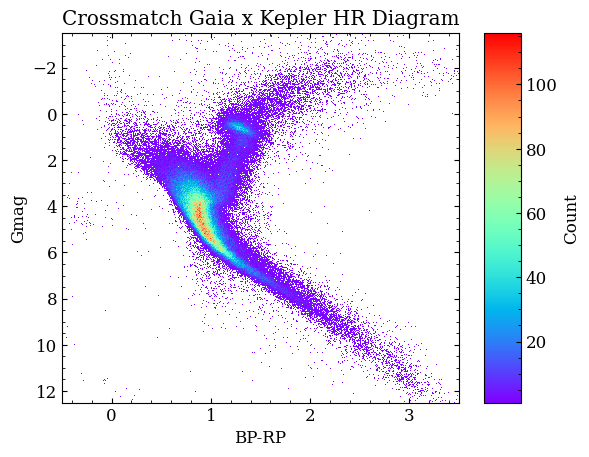

In [6]:
x = data['bp_rp']
y = data['Gmag']
bins = 800

fig, ax = plt.subplots()

img = ax.hist2d(x, y, bins = bins, cmin = 1, cmap = 'rainbow')

fig.colorbar(img[3],label='Count', aspect=10, ax=ax)

ax.set_title('Crossmatch Gaia x Kepler HR Diagram')
ax.set_xlabel('BP-RP')
ax.set_ylabel('Gmag')
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(12.5, -3.5)

plt.show()

# REFERÊNCIAS
- https://gaia-kepler.fun/
- DO NASCIMENTO JR, J.-D. et al. Rotation of Solar Analogs Crossmatching Kepler and Gaia DR2. The Astrophysical Journal, v. 898, n. 2, p. 173, 2020.